In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
import pdb
from sklearn import svm, linear_model
from sklearn.ensemble import RandomForestClassifier
import random

In [3]:
#Load data from given files
from itertools import izip_longest
import csv
with open('dexter_train.labels', 'rb') as csv1,open('dexter_train.data', 'rb') as csv2,open('concat.txt', 'w') as out:
    spam1 = csv.reader(csv1)
    spam2 = csv.reader(csv2)
    last_column=list(izip_longest(*spam2))[-1]
    for i,j in  izip_longest(spam1,last_column):
        out.write(','.join([t.strip(';') for t in i])+' '+j+'\n')
        
from itertools import izip_longest
import csv
with open('dexter_valid.labels', 'rb') as csv1,open('dexter_valid.data', 'rb') as csv2,open('valid.txt', 'w') as out:
    spam1 = csv.reader(csv1)
    spam2 = csv.reader(csv2)
    last_column=list(izip_longest(*spam2))[-1]
    for i,j in  izip_longest(spam1,last_column):
        out.write(','.join([t.strip(';') for t in i])+' '+j+'\n')

In [4]:
# trainLabl=np.genfromtxt('dexter_train.labels')
TrainData = load_svmlight_file("concat.txt")#created in the cell above
valid=load_svmlight_file('valid.txt')#created in the cell above

In [5]:
X=TrainData[0] #training data
Ytrain=TrainData[1] #training label
Xvalid=valid[0] # validating data
Yvalid=valid[1] # validating labels
#concatinate training+validation data to do cross validation
N,d=X.shape

In [6]:
Xtrain=X.todense()
for i in range(N):    
    Xtrain[i,:]=Xtrain[i,:]/np.linalg.norm(Xtrain[i,:], ord=2)
print(X[0:3, 0:10])
print(Xtrain[0:3, 0:10])
print(np.sum(Xtrain>1))

  (0, 9)	105.0
[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.08021423]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
0


In [7]:
#checking what we have
# print(np.linalg.norm(trainLabl-Ytrain, ord=1))
print(Xtrain.shape, Xvalid.shape)
# X=np.concatenate((Xtrain, Xvalid))
# print(Xtrain)

((300, 19999), (300, 19999))


In [21]:
# clf = svm.SVC()
# clf.fit(Xtrain, Ytrain) 
# Predict=clf.predict(Xvalid.todense())
# print('regular error',np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100)
# #Balanced Error Rate from "Feature Extraction" by I. Guyon et al, Chapter 12
# # BER=1/2 *(#positive instances predicted worng/positive instances +
# #           #negative instances predicted worng/negative instances )

# pMask=(Yvalid==1)
# nMask=(Yvalid==-1)
# numPos=np.sum(pMask)
# numNeg=np.sum(nMask)

# # print type(Predict)
# # print type(positiveMask)
# # print(Predict[0:10].shape)
# # print(positiveMask.shape)
# # print Xtrain[positiveMask,:]

# Pos=Predict[pMask]+Yvalid[pMask]
# Neg=Predict[nMask]+Yvalid[nMask]
# errorP=np.sum(Pos==0)
# errorN=np.sum(Neg==0)
# print(errorP, errorN)
# print(numPos, numNeg)
# BEF=1.0/2*(errorP*1.0/numPos+errorN*1.0/numNeg)*100
# print('BEF', BEF)

Thus, SVM gives 50% error.

Now compute F-score of our data:

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [9]:
N

300

(135, 135)
((270, 19999), (1, 19999), (1, 19999), (1, 19999))
((1, 19999), (1, 19999))
('k', 7701)
(0, 150)
(150, 150)
('BEF', 50.0)


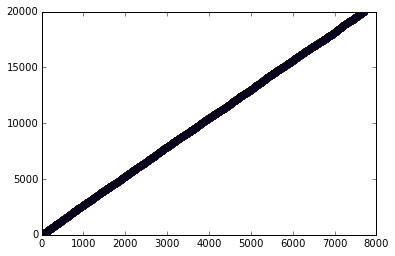

In [20]:
# for i in range(5):
train_index=random.sample(range(Xtrain.shape[0]), 270 ) # 80% for training, 20% for cross-validation
cv_index=list(set(range(Xtrain.shape[0]))-set(train_index)) #cross-validation set
Xtr=Xtrain[train_index,:]
Xcv=Xtrain[cv_index,:]
Ytr=Ytrain[train_index]
Ycv=Ytrain[cv_index]
positiveMask=Ytr==1
negativeMask=Ytr==-1
numPos=np.sum(positiveMask)
numNeg=np.sum(negativeMask)
print(numPos, numNeg)
Xposmean=Xtr[positiveMask,:].mean(0)
Xnegmean=Xtr[negativeMask,:].mean(0)
Xmean=Xtr.mean(0)
print(Xtr.shape, Xposmean.shape, Xnegmean.shape, Xmean.shape)
# print(numPos, numNeg)
numer=(np.square(Xposmean-Xmean)+np.square(Xnegmean-Xmean))
denomin=np.sum(np.square(Xtrain[positiveMask,:]-Xposmean), axis=0)*1.0/(numPos-1)+np.sum(np.square(Xtrain[negativeMask,:]-Xnegmean), axis=0)*1.0/(numNeg-1)
print(numer.shape, denomin.shape)

FScore=np.zeros(numer.shape[1])
ind=FScore
k=0 #keeps number of features that have nonzero F-score
for i in range(numer.shape[1]):
    if denomin[0,i]!=0:
        FScore[k]=numer[0,i]/denomin[0,i]
        ind[k]=i
        k+=1
print('k',k)   
index=ind[0:k].astype(int)
plt.plot(FScore[0:k],'ro')
plt.plot(index[0:k],'b*')
clf = svm.SVC()
clf.fit(Xtrain[:,index[0:k]], Ytrain) 
Predict_Fscore=clf.predict(Xvalid[:,index[0:k]].todense())
pMask=(Yvalid==1)
nMask=(Yvalid==-1)

Pfscore=Predict_Fscore[pMask]+Yvalid[pMask]
Nfscore=Predict_Fscore[nMask]+Yvalid[nMask]
errorPfscore=np.sum(Pfscore==0)
errorNfscore=np.sum(Nfscore==0)
numPos=np.sum(pMask)
numNeg=np.sum(nMask)
print(errorPfscore, errorNfscore)
print(numPos, numNeg)
BEF=1.0/2*(errorPfscore*1.0/numPos+errorNfscore*1.0/numNeg)*100
print('BEF', BEF)
Xtr=None
Ytr=None
Xcv=None
Ycv=None
positiveMask=None
negativeMask=None
Xposmean=None
Xnegmean=None
Xmean=None
numer=None
denomin=None
FScore=None
index=None
Predict_Fscore=None
pMask=None
nMask=None
Pfscore=None
Nfscore=None
index=None
ind=None

In [17]:
index[0:k]


array([  3.00000000e+00,   5.00000000e+00,   7.00000000e+00, ...,
         1.99950000e+04,   1.99960000e+04,   1.99980000e+04])

In [78]:
# plt.plot(numer[0,:],'ko')
# plt.show()

In [79]:
A=np.square(Xtrain[negativeMask,:]-Xnegmean)
print(A.shape)
print((np.sum(A, axis=0)).shape)
print(numPos, numNeg)

(138, 19999)
(1, 19999)
(132, 138)


[[ 0.          0.          0.         ...,  0.02250881  0.          3.02521925]]


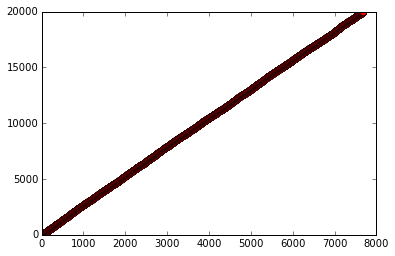

In [80]:
print(numer[0,:])


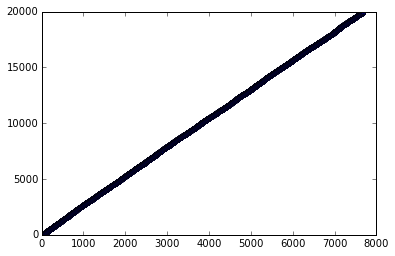

In [82]:
index[0:k]

array([  3.00000000e+00,   5.00000000e+00,   7.00000000e+00, ...,
         1.99950000e+04,   1.99960000e+04,   1.99980000e+04])

In [83]:
k

7688

In [84]:
 9947-2562

7385

Apply SVM to features selected by high F-score

(1, 100)
(150, 150)
('BEF', 33.666666666666664)


In [86]:
print('regular error',np.sum(Predict_Fscore!=Yvalid)/(1.*len(Yvalid))*100)

('regular error', 33.666666666666664)


Thus, F-score+SVM gives 14.6% error.

In [50]:
np.sum(FScore>0.015)

7637

In [51]:
Predict_Fscore.shape

(300,)

In [6]:

a=random.sample(range(5),  3)

In [10]:
list(set(range(N))-set(a))

TypeError: only length-1 arrays can be converted to Python scalars

In [12]:
N

array([-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2.])

In [10]:
reset?
